In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-credit-card-customer-attrition-with-m/BankChurners.csv


# <span style='color:#fcbf49'><center style='background:#003049;padding:20px'> Credit Card Attrition</center></span>

![](https://images.unsplash.com/photo-1589758438368-0ad531db3366?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2832&q=80)

**<span style="color:#f77f00;">General Overview</span>**

Customer Attrition is when a business loses its customers. It is known by many names like Customer Churn and Customer turnover, but it all means the same thing -A customer who breaks all ties with the organization.

In this notebook, I have used Gaussian Naives Bayer Classifier for predicting the customer attrition. Aprt from this, Principal Component Analysis, One Hot Encoding, Data Vizualisation, Feature Engineering are also performed.

<span style="color:#f77f00;">Please **<span style="color:#d62828;">UPVOTE</span>** if you like the efforts put in the notebook and also let me know if there are any errors in the same!</span>


# **<span style="color:#d62828;">1. Getting Started!</span>**

In [3]:
pip install pywaffle

In [3]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

1. We get started by importing the basic libraries like pandas, numpy.
2. We are using seaborn and pyWaffle for making the vizualisations more interesting and appealing.

# **<span style="color:#d62828;">2. The Dataset</span>**

In [89]:
credit = pd.read_csv("/kaggle/input/predicting-credit-card-customer-attrition-with-m/BankChurners.csv")
credit

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


1. Dataset has 10127 entries and 23 Columns

In [90]:
credit = credit.loc[:, ~credit.columns.isin(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])]

Temporarily getting rid of last two columns due to excessive length.

In [7]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
credit.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

# **<span style="color:#d62828;">2. Categorical Data</span>**

In [91]:
categorical_indexes = list(range(1, 9))
credit.iloc[:,categorical_indexes] = credit.iloc[:,categorical_indexes].astype('category')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [92]:
credit = credit.loc[:, ~credit.columns.isin([3, 5, 6, 7, 8])]

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  category
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [13]:
credit.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

No NULL values or missing values.

# **<span style="color:#d62828;">3. Data Visualization</span>**
Using Python libraries like pyWaffle and Seaborn

# **Customer Attirbution**

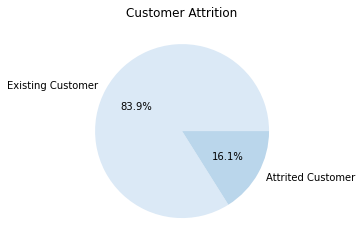

In [14]:
plt.pie(credit.Attrition_Flag.value_counts(), labels = ["Existing Customer", "Attrited Customer"], colors = sns.color_palette("Blues"), 
        autopct = '%1.1f%%')
plt.title("Customer Attrition")
pass

# **Customer Age**

Text(0.5, 0, 'Age Group')

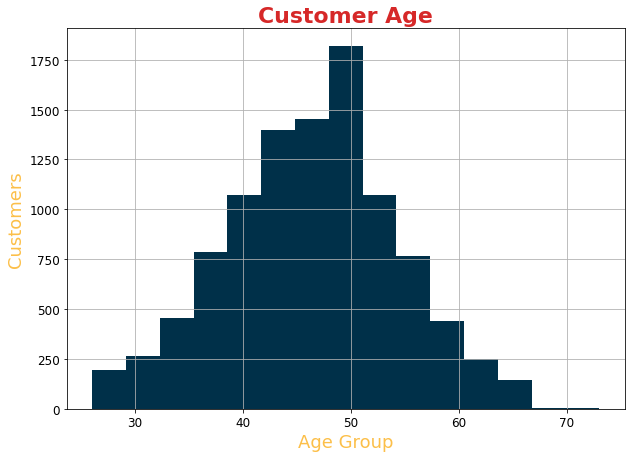

In [85]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(credit.Customer_Age, bins =15, color ='#003049')

plt.grid()
plt.title("Customer Age", weight="bold", size="22", color='#d62828')
plt.ylabel("Customers", size="18", color='#fcbf49')
plt.xlabel("Age Group", size="18", color='#fcbf49')

# **Gender Distribution**

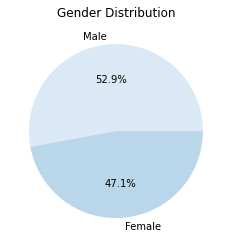

In [16]:
plt.pie(credit.Gender.value_counts(), labels = ["Male", "Female"], colors = sns.color_palette("Blues"), 
        autopct = '%1.1f%%')
plt.title("Gender Distribution")
pass

# **Number of Dependents**

Text(0.5, 0, 'Dependents')

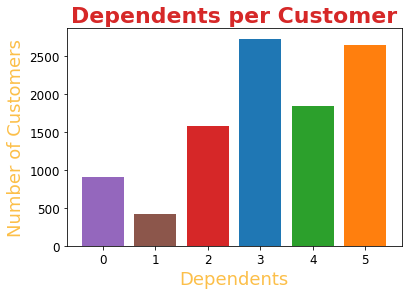

In [97]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b']

plt.bar(credit.Dependent_count.unique(), credit.Dependent_count.value_counts(), color=colors)

plt.title("Dependents per Customer", weight="bold", size="22", color='#d62828')
plt.ylabel("Number of Customers", size="18", color='#fcbf49')
plt.xlabel("Dependents", size="18", color='#fcbf49')

# **Education Level**

We are using a Python library called PyWaffle for making these type of vizualisations.

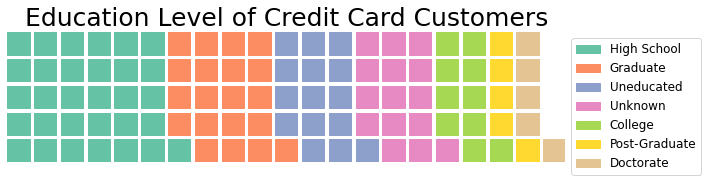

In [98]:
fig = plt.figure(FigureClass=Waffle, figsize=(10,10), values=credit.Education_Level.value_counts()/100, rows=5,
                 labels=list(credit.Education_Level.unique()),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Education Level of Credit Card Customers', fontsize=25)
plt.show()

# **Marital Status**

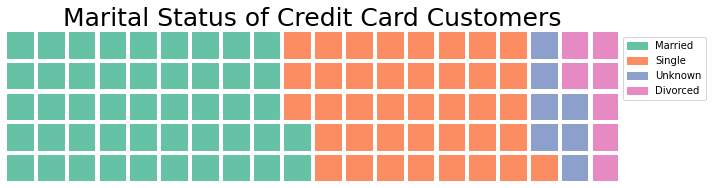

In [19]:
fig = plt.figure(FigureClass=Waffle, figsize=(10,10), values=credit.Marital_Status.value_counts()/100, rows=5,
                 labels=list(credit.Marital_Status.unique()),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Marital Status of Credit Card Customers', fontsize=25)
plt.show()

# **Income Status**

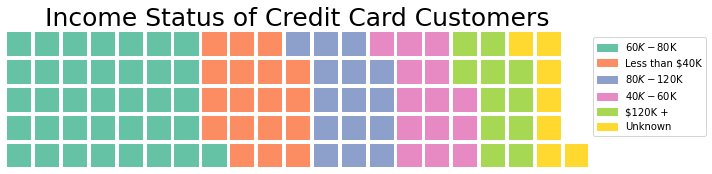

In [20]:
fig = plt.figure(FigureClass=Waffle, figsize=(10,10), values=credit.Income_Category.value_counts()/100, rows=5,
                 labels=list(credit.Income_Category.unique()),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Income Status of Credit Card Customers', fontsize=25)
plt.show()

# **Types of Credit Cards**

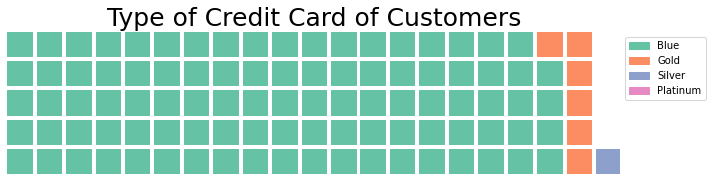

In [21]:
fig = plt.figure(FigureClass=Waffle, figsize=(10,10), values=credit.Card_Category.value_counts()/100, rows=5,
                 labels=list(credit.Card_Category.unique()),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Type of Credit Card of Customers', fontsize=25)
plt.show()

# **Customers on Book**

Text(0.5, 0, 'Months')

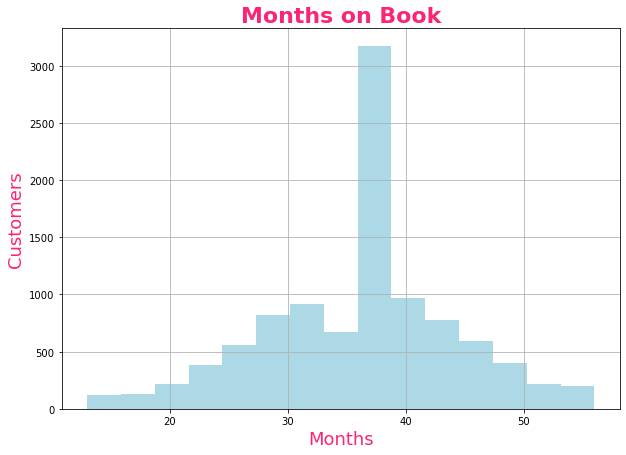

In [22]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(credit.Months_on_book, bins =15, color ='lightblue')

plt.grid()
plt.title("Months on Book", weight="bold", size="22", color='#FB2576')
plt.ylabel("Customers", size="18", color='#FB2576')
plt.xlabel("Months", size="18", color='#FB2576')

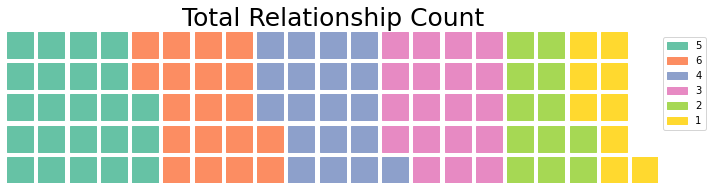

In [23]:
fig = plt.figure(FigureClass=Waffle, figsize=(10,10), values=credit.Total_Relationship_Count.value_counts()/100, rows=5,
                 labels=list(credit.Total_Relationship_Count.unique()),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Total Relationship Count', fontsize=25)
plt.show()

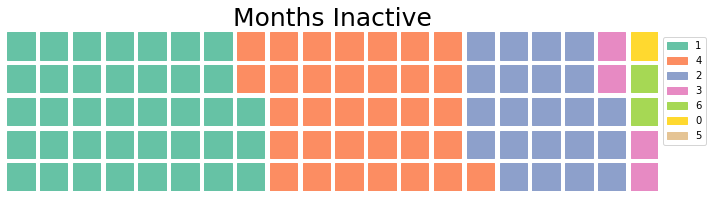

In [24]:
fig = plt.figure(FigureClass=Waffle, figsize=(10,10), values=credit.Months_Inactive_12_mon.value_counts()/100, rows=5,
                 labels=list(credit.Months_Inactive_12_mon.unique()),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Months Inactive', fontsize=25)
plt.show()

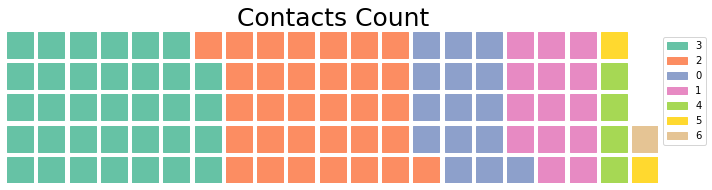

In [25]:
fig = plt.figure(FigureClass=Waffle, figsize=(10,10), values=credit.Contacts_Count_12_mon.value_counts()/100, rows=5,
                 labels=list(credit.Contacts_Count_12_mon.unique()),
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Contacts Count', fontsize=25)
plt.show()

<span style="color:#f77f00;"><font size="+2">Some Observations:</font></span>

1. The percentage of attrited customers is much less than the existing customers.
2. Majority of the customers who have/use a credit card lie in the age group of 40-50 years.
3. Slightly higher number of male as opposed to female credit card owners.
4. Parameters like marriage, education level or even income don't have that much effect on the credit card            ownership.
5. Most people prefer the basic type of credit card, while very few opt for gold or silver.
6. Virtually, no one opts for Platinum credit card.
7. There are a large number of people who have been using a credit card for 3+ years.

# **<span style="color:#d62828;">4. Non-Categorical Data</span>**

**Coorelation Matrix**

In [26]:
corr = credit.corr()

corr.style.background_gradient(cmap='BuGn')

,CLIENTNUM,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Months_on_book,0.134588,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,0.017369,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235
Total_Trans_Amt,-0.019692,-0.038591,-0.347229,-0.036982,-0.112774,0.171730,0.064370,0.165923,0.039678,1.000000,0.807192,0.085581,-0.083034


There is some co-relation between the columns: "Total_Trans_Amt" and "Total_Trans_Ct".

Meaning of the columns:

* Total_Trans_Ct: Total transaction count.
* Total_Trans_Amt: Total transaction amount.

Near perfect co-relation is observed between Credit Limit and Average Open to Buy. This is because
Open-to-Buy is the difference between the credit limit assigned to a cardholder account and the present balance on the account.

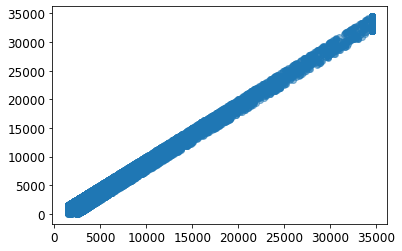

In [100]:
plt.scatter(credit['Credit_Limit'], credit['Avg_Open_To_Buy'], alpha = 0.5)
pass

# **<span style="color:#d62828;">5. One Hot Encoding</span>**
For categorical data (1 to 12)

In [28]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  category
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Separating all the columns with categorical data 
categorical = [ 'Gender', 'Education_Level', 'Dependent_count', 'Marital_Status', 'Income_Category', 'Card_Category']
df_categorical = credit[categorical]

#We will use One Hot Encoding
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

df_categorical = one_hot_encoder.fit_transform(df_categorical).toarray()

#Drop the categorical columns
credit = credit.drop(categorical, axis=1)

#Append the encoded columns to dataframe
encoded_cols = []
for i in range(df_categorical.shape[1]):
    encoded_col = 'encoded_' + str(i)
    credit[encoded_col] = df_categorical[:, i]
    encoded_cols.append(encoded_col)
    
print(credit.dtypes)

CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
encoded_0                    float64
encoded_1                    float64
encoded_2                    float64
encoded_3                    float64
encoded_4                    float64
encoded_5                    float64
encoded_6                    float64
encoded_7                    float64
encoded_8                    float64
encoded_9                    float64
encoded_10                   float64
encoded_11                   float64
e

# **<span style="color:#d62828;">6. Standardization</span>**

In [31]:
from sklearn.preprocessing import StandardScaler

numerical = credit[credit.columns[13:21]]
x_std = StandardScaler().fit_transform(numerical)

print(x_std)

[[ 3.8340026  -0.77588223 -1.05995565 ... -0.21589388 -0.66852149
   2.00768518]
 [12.60857291 -0.61627565  0.9434357  ... -0.21589388  1.49583822
  -0.49808606]
 [ 6.80786367 -0.99715499 -1.05995565 ... -0.21589388  1.49583822
  -0.49808606]
 ...
 [ 0.44430503 -0.99715499  0.9434357  ... -0.21589388 -0.66852149
   2.00768518]
 [ 0.04106963 -0.99715499 -1.05995565 ... -0.21589388  1.49583822
  -0.49808606]
 [-0.26555729 -0.31157218  0.9434357  ... -0.21589388  1.49583822
  -0.49808606]]


# **<span style="color:#d62828;">7. Principal Component Analysis (Long Method)</span>**
Dimensionality Reduction (13 to 20)

In [34]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)        #Covariance Matrix

eig_val, eig_vec = np.linalg.eig(cov_mat)                                          #Eigen Decomposition

for ev in eig_vec.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    
    
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_val)
var_exp = [(i / tot)*100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# **Explained Variance**

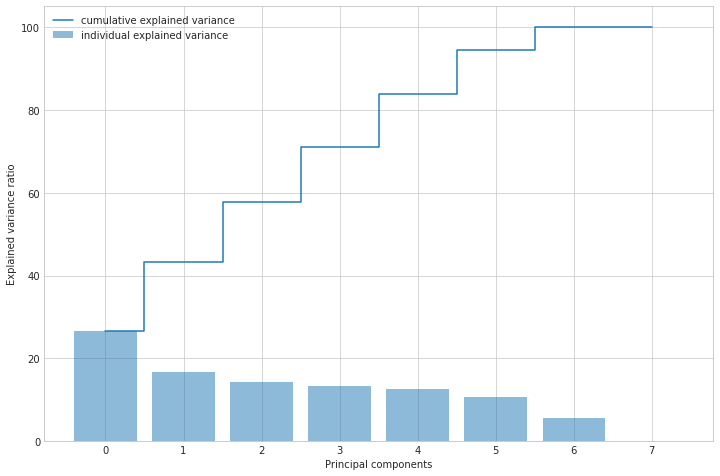

In [35]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    
    plt.step(range(8), cum_var_exp, where='mid',
             label='cumulative explained variance')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

In [36]:
matrix_w = np.hstack(( eig_pairs[0][1].reshape(8,1),
                      eig_pairs[1][1].reshape(8,1),
                      eig_pairs[2][1].reshape(8,1),
                      eig_pairs[3][1].reshape(8,1)))

pca_output = x_std.dot(matrix_w)
print(pca_output)

[[ 1.62486914 -1.71206781  1.37740958 -1.73173356]
 [-1.45119822  1.24998935  1.01962127 -5.25707575]
 [ 1.51384424  1.43597971  0.72070886 -2.8912556 ]
 ...
 [-0.90499606 -1.70818385  1.11182273 -0.07519291]
 [ 1.69658324  1.56842008  0.34242298 -0.02197905]
 [-1.19814946  1.4969035   0.3255837   0.13838819]]


# **<span style="color:#d62828;">8. Principal Component Analysis (Short Method)</span>**
Shorter way of implementing PCA by directly using Factor Analyzer function.

In [ ]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

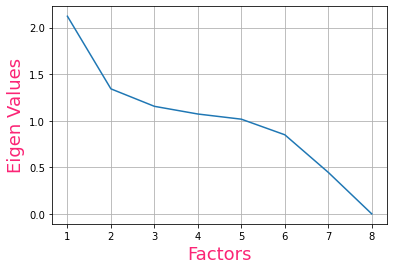

In [38]:
numerical =credit[credit.columns[13:21]] 
fa = FactorAnalyzer()
fa.fit(numerical, 10)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,numerical.shape[1]+1),ev)

#plt.title("Flight Delay", weight="bold", size="22", color='#FB2576')
plt.grid()
plt.xlabel("Factors", size="18", color='#FB2576')
plt.ylabel("Eigen Values", size="18", color='#FB2576')
pass

From the graph it is clear that the eigen values falls below 1 after 4th factor.                                     
Therefore, we will consider 4 components for PCA.

**PCA using built in SK-Learn library**

In [39]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(x_std)

print(Y_sklearn)

[[-1.62486914  1.71206781 -1.37740958  1.73173356]
 [ 1.45119822 -1.24998935 -1.01962127  5.25707575]
 [-1.51384424 -1.43597971 -0.72070886  2.8912556 ]
 ...
 [ 0.90499606  1.70818385 -1.11182273  0.07519291]
 [-1.69658324 -1.56842008 -0.34242298  0.02197905]
 [ 1.19814946 -1.4969035  -0.3255837  -0.13838819]]


# **<span style="color:#d62828;">9.Declare Feature vector and Target vector</span>**

Convert tuple back to dataframe.

We will use the tuple obtained from performing PCA as our input for the classifier.

In [40]:
X = pd.DataFrame(list(Y_sklearn))

Here our target variable is the Attrition Flag. It has two unique labels:
1. Existing Customer - 0
2. Attrited Customer - 1

In [41]:
y = credit["Attrition_Flag"]

# **<span style="color:#d62828;">10. Train-Test Split</span>**
We will use 70% of data for training set for our classifier and rest will be used for prediction.

In [42]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [43]:
#Shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7088, 4), (3039, 4), (7088,), (3039,))

# **<span style="color:#d62828;">11. Naives Bayer Classifier</span>**

A classifier is a machine learning model that is used to discriminate different objects based on certain features.
Here we are using Gaussian Naives Bayer Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = gnb.predict(X_test)

y_pred

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype='<U17')

# **<span style="color:#d62828;">12. Accuracy Testing</span>**

In [46]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8302


In [47]:
y_test.value_counts()

Existing Customer    2583
Attrited Customer     456
Name: Attrition_Flag, dtype: int64

In [80]:
np.unique(y_pred, return_counts=True)

(array(['Attrited Customer', 'Existing Customer'], dtype='<U17'),
 array([ 124, 2915]))

# **<span style="color:#d62828;">13. Confusion Matrix</span>**

<AxesSubplot:>

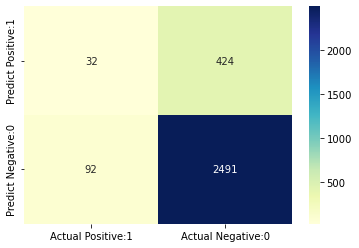

In [48]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=con_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.26      0.07      0.11       456
Existing Customer       0.85      0.96      0.91      2583

         accuracy                           0.83      3039
        macro avg       0.56      0.52      0.51      3039
     weighted avg       0.77      0.83      0.79      3039



**<span style="color:#f77f00;"><font size="+20">In Conclusion!</font></span>**

So, we have tried to analyze the credit customer attiriton dataset by vizualising the various parameters related to the customer. Next we have divided the data into categorical and numerical and performed One Hot Encoding and Principal Component Analysis respectively. Lastly, we have managed to classify the customer attrition using Naives Bayer Classifier and make predictions on the test dataset. 

<span style="color:#d62828;">Some Observations:</span>
1. Accuracy of Naives Bayer Classifier is 83%.
2. From the Confusion Matrix, we can observe that the model is more efficient at predicting existing customer.

<span style="color:#d62828;">Future Works:</span>
1. Include categorical data, in classifier model.
2. Try different classification algorithms and compare accuracy.


<span style="color:#f77f00;"><font size="+2">Please **<span style="color:#d62828;">UPVOTE</span>** if you like the efforts put in the notebook and also let me know if there are any errors in the same!</font></span>